In [195]:
import pandas as pd
raw_df=pd.read_excel('/content/loan.xlsx')

In [196]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip                2096 non-null   int64  
 1   BankState          2096 non-null   object 
 2   NoEmp              2096 non-null   int64  
 3   CreateJob          2096 non-null   int64  
 4   UrbanRural         2096 non-null   object 
 5   DisbursementGross  2096 non-null   int64  
 6   New                2096 non-null   int64  
 7   RealEstate         2096 non-null   int64  
 8   Portion            2096 non-null   float64
 9   Recession          2096 non-null   int64  
 10  Default            2096 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 180.2+ KB


In [197]:
raw_df.head()

,Zip,BankState,NoEmp,CreateJob,UrbanRural,DisbursementGross,New,RealEstate,Portion,Recession,Default
0,90505,CA,1,0,UNDEFINED,30000,0,0,0.5,1,0
1,94583,NC,4,0,URBAN,17500,1,0,0.5,0,0
2,94103,NC,1,0,URBAN,17536,0,0,0.5,0,0
3,91354,IL,2,0,RURAL,30000,1,0,0.5,0,1
4,95965,NC,8,0,URBAN,30502,0,0,0.5,0,0


In [198]:
raw_df.New = raw_df.New.astype('category')
raw_df.RealEstate = raw_df.RealEstate.astype('category')
raw_df.Recession = raw_df.Recession.astype('category')

In [199]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a dataframe called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'Default' )
X_features.remove( 'Zip' )
X_features.remove( 'BankState' )

In [200]:
X.head()

,NoEmp,CreateJob,UrbanRural,DisbursementGross,New,RealEstate,Portion,Recession
0,1,0,UNDEFINED,30000,0,0,0.5,1
1,4,0,URBAN,17500,1,0,0.5,0
2,1,0,URBAN,17536,0,0,0.5,0
3,2,0,RURAL,30000,1,0,0.5,0
4,8,0,URBAN,30502,0,0,0.5,0


In [201]:
print(X_features)

['NoEmp', 'CreateJob', 'UrbanRural', 'DisbursementGross', 'New', 'RealEstate', 'Portion', 'Recession']


In [202]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [203]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------

Y = raw_df.Default.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2096 entries, 0 to 2095
Series name: Default
Non-Null Count  Dtype   
--------------  -----   
2096 non-null   category
dtypes: category(1)
memory usage: 2.3 KB
None


In [204]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Zip                2096 non-null   int64   
 1   BankState          2096 non-null   object  
 2   NoEmp              2096 non-null   int64   
 3   CreateJob          2096 non-null   int64   
 4   UrbanRural         2096 non-null   object  
 5   DisbursementGross  2096 non-null   int64   
 6   New                2096 non-null   category
 7   RealEstate         2096 non-null   category
 8   Portion            2096 non-null   float64 
 9   Recession          2096 non-null   category
 10  Default            2096 non-null   int64   
dtypes: category(3), float64(1), int64(5), object(2)
memory usage: 137.6+ KB


In [205]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 1467 entries, 1105 to 951
Series name: Default
Non-Null Count  Dtype   
--------------  -----   
1467 non-null   category
dtypes: category(1)
memory usage: 13.0 KB
None


In [206]:
X.select_dtypes(include=['category','object']).columns

Index(['UrbanRural', 'New', 'RealEstate', 'Recession'], dtype='object')

In [207]:
X.select_dtypes(include=['int64','float64']).columns

Index(['NoEmp', 'CreateJob', 'DisbursementGross', 'Portion'], dtype='object')

In [208]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['UrbanRural', 'New', 'RealEstate', 'Recession']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)



In [209]:
##-----------------------------------------------------------------------
##  2. Normalise the cont. columns
##-----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
continuous_columns= ['NoEmp', 'CreateJob', 'DisbursementGross', 'Portion']
scaler_min_max = MinMaxScaler()
X_train_encoded[continuous_columns] = scaler_min_max.fit_transform(X_train_encoded[continuous_columns])
X_test_encoded[continuous_columns] = scaler_min_max.fit_transform(X_test_encoded[continuous_columns])

In [210]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1467 entries, 1105 to 951
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NoEmp                 1467 non-null   float64
 1   CreateJob             1467 non-null   float64
 2   DisbursementGross     1467 non-null   float64
 3   Portion               1467 non-null   float64
 4   UrbanRural_UNDEFINED  1467 non-null   int64  
 5   UrbanRural_URBAN      1467 non-null   int64  
 6   New_1                 1467 non-null   int64  
 7   RealEstate_1          1467 non-null   int64  
 8   Recession_1           1467 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 114.6 KB


In [211]:
X_train_encoded.head()

,NoEmp,CreateJob,DisbursementGross,Portion,UrbanRural_UNDEFINED,UrbanRural_URBAN,New_1,RealEstate_1,Recession_1
1105,0.003077,0.02,5.757617e-02,0.644498,0,0,0,0,0
1918,0.001538,0.01,4.329002e-07,0.786699,0,1,0,0,0
784,0.007692,0.02,3.409912e-02,0.288995,0,0,0,0,0
1231,0.007692,0.00,3.474029e-01,0.715598,1,0,0,1,0
1958,0.001538,0.00,2.142861e-01,0.857799,0,0,0,0,0


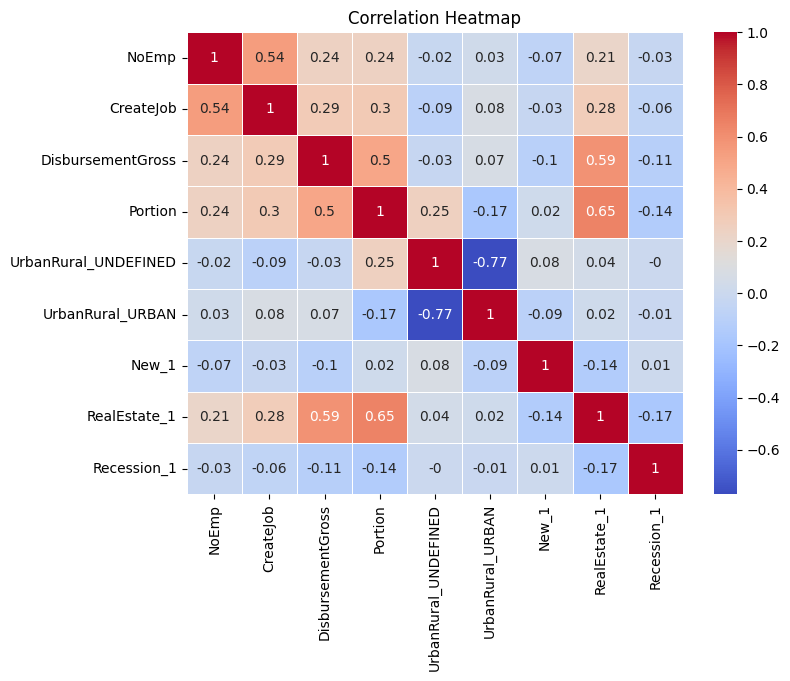

In [212]:
##-----------------------------------------------------------------------
##  3. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- greater than 0.6 are genrally considered as correlated

In [213]:
corr_matrix

,NoEmp,CreateJob,DisbursementGross,Portion,UrbanRural_UNDEFINED,UrbanRural_URBAN,New_1,RealEstate_1,Recession_1
NoEmp,1.000000,0.539605,0.239754,0.235945,-0.019900,0.026661,-0.066320,0.213038,-0.029350
CreateJob,0.539605,1.000000,0.292957,0.304323,-0.088962,0.083606,-0.034239,0.277852,-0.055285
DisbursementGross,0.239754,0.292957,1.000000,0.499769,-0.034854,0.069421,-0.102395,0.587291,-0.114316
Portion,0.235945,0.304323,0.499769,1.000000,0.248059,-0.168760,0.021917,0.654700,-0.139932
UrbanRural_UNDEFINED,-0.019900,-0.088962,-0.034854,0.248059,1.000000,-0.770772,0.078786,0.035116,-0.000184
UrbanRural_URBAN,0.026661,0.083606,0.069421,-0.168760,-0.770772,1.000000,-0.088699,0.018742,-0.009173
New_1,-0.066320,-0.034239,-0.102395,0.021917,0.078786,-0.088699,1.000000,-0.142666,0.005794
RealEstate_1,0.213038,0.277852,0.587291,0.654700,0.035116,0.018742,-0.142666,1.000000,-0.169458
Recession_1,-0.029350,-0.055285,-0.114316,-0.139932,-0.000184,-0.009173,0.005794,-0.169458,1.000000


In [214]:
from sklearn.neural_network import MLPClassifier
# no of nodes in hidden layer = 9 -> 2/3*(8+2)
# no of iterations increased to 1500
# verbose  = True
# early stopping  = True
nn_model = MLPClassifier(random_state=42, verbose=True, max_iter=1500,hidden_layer_sizes=(7,), early_stopping = True, learning_rate_init=0.15)

In [215]:
print("Hyperparameters of the MLPClassifier:\n",nn_model.get_params() )

Hyperparameters of the MLPClassifier:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (7,), 'learning_rate': 'constant', 'learning_rate_init': 0.15, 'max_fun': 15000, 'max_iter': 1500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}


In [216]:
##-------------------------------------------------------
##  Train NN model on training data
##-------------------------------------------------------
nn_model.fit(X_train_encoded, y_train)

Iteration 1, loss = 0.57956832
Validation score: 0.666667
Iteration 2, loss = 0.52943411
Validation score: 0.625850
Iteration 3, loss = 0.52226840
Validation score: 0.673469
Iteration 4, loss = 0.51460466
Validation score: 0.687075
Iteration 5, loss = 0.51254691
Validation score: 0.646259
Iteration 6, loss = 0.50948041
Validation score: 0.666667
Iteration 7, loss = 0.51161933
Validation score: 0.687075
Iteration 8, loss = 0.51061969
Validation score: 0.639456
Iteration 9, loss = 0.51041808
Validation score: 0.714286
Iteration 10, loss = 0.50690756
Validation score: 0.639456
Iteration 11, loss = 0.50889877
Validation score: 0.714286
Iteration 12, loss = 0.50353728
Validation score: 0.646259
Iteration 13, loss = 0.50478283
Validation score: 0.714286
Iteration 14, loss = 0.50659808
Validation score: 0.639456
Iteration 15, loss = 0.50577168
Validation score: 0.680272
Iteration 16, loss = 0.50346617
Validation score: 0.707483
Iteration 17, loss = 0.50569473
Validation score: 0.653061
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(7,),
              learning_rate_init=0.15, max_iter=1500, random_state=42,
              verbose=True)

In [217]:
##----------------------------
##  Apply model on test data
##----------------------------
y_prob=nn_model.predict_proba(X_test_encoded)[:,1] # probabilities
#y_prob holds the probability values for each record in the test data

In [218]:
y_prob

array([5.54606630e-01, 2.99761756e-01, 6.05278964e-01, 5.42080598e-01,
       3.47482191e-01, 3.31871408e-03, 4.73812347e-01, 9.40292423e-03,
       1.95776016e-02, 2.18453539e-02, 5.84551459e-01, 3.43554004e-01,
       8.21631735e-03, 1.99278111e-01, 5.21087070e-01, 5.21970241e-01,
       4.46273370e-03, 5.20553264e-01, 3.44988157e-01, 5.27982659e-01,
       3.96467258e-01, 5.42573049e-02, 7.96866317e-02, 5.10188041e-01,
       3.35314076e-02, 5.26201409e-01, 4.32168651e-01, 5.06669106e-01,
       5.43803425e-01, 2.27647694e-01, 5.75696283e-03, 6.33426486e-02,
       5.51877857e-01, 5.18430594e-01, 1.33518369e-01, 3.24988043e-01,
       5.57076541e-01, 5.62624379e-01, 5.67742414e-02, 5.92036589e-01,
       1.29837327e-01, 2.29933077e-01, 5.87878822e-02, 1.23214429e-01,
       1.21044326e-02, 2.66289703e-01, 2.94470916e-01, 4.46482346e-01,
       4.65085088e-01, 3.47666961e-01, 5.21227006e-01, 5.20416396e-01,
       5.18723591e-01, 5.58493233e-01, 5.48761385e-01, 5.32506969e-01,
      

In [219]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})
print(y_pred_df.head())

     actual_Y  predicted_prob
1992        0        0.554607
247         0        0.299762
69          1        0.605279
299         0        0.542081
231         1        0.347482


In [220]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
1992        0        0.554607            1
247         0        0.299762            0
69          1        0.605279            1
299         0        0.542081            1
231         1        0.347482            0


In [221]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[297 122]
 [ 79 131]]


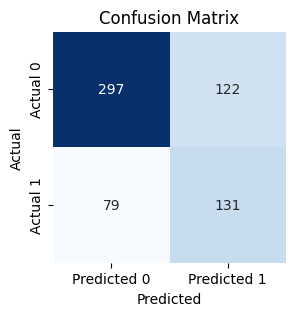

In [222]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [223]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
#print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.62
Accuracy: 0.68


In [224]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       419
           1       0.52      0.62      0.57       210

    accuracy                           0.68       629
   macro avg       0.65      0.67      0.66       629
weighted avg       0.70      0.68      0.69       629



##  Conclusion:
- Model accuracy = 68%

point of interset -> class 1(Default = 1)
Sensiitivity = 62%

##  Analysis:
- nn hyper params-
 max_iterations = 1500

 early_stopping = True

 hidden_layer_sizes = 7

 ## Interpretation

 learning_rate_init = 0.15 -> default

 for credit risk type problem the threshold is

 - The following are the % for TPR and FPR, there should be a balance between TPR(Sensitivity) and FPR(Specificity)

 Mid -> 60%
 Good -> 70%
 Very Good 0> 80%

 So, with 0.15 learning rate we are getting a TPR and FPR of 60% ~ 70% range
 which is a good value for our model